<a href="https://colab.research.google.com/github/boufik/Google-Colab-Projects/blob/main/TitForTat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rules for gaining coins
## Cooperation / Cooperation : 3 / 3
## Cooperation / defection : 0 / 5
## defection / defection : 1 / 1

# Critical variables
* ROUNDS (200)
* ITERATIONS (10)
* play_with_itself (True)
* include_random (False)
* verbose (False)
* stats (True)
* visualize (False)

In [243]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [244]:
def determine_new_points(points1, points2, decision1, decision2):
    if decision1 == 'C' and decision2 == 'C':
        points1 += 3
        points2 += 3
    elif decision1 == 'C' and decision2 == 'd':
        points1 += 0
        points2 += 5
    elif decision1 == 'd' and decision2 == 'C':
        points1 += 5
        points2 += 0
    else:
        points1 += 1
        points2 += 1
    return points1, points2

# STRATEGIES

In [245]:
def tit_for_tat(round, opponent_moves):
    # Starts cooperating. From round 2, it copies its opponent's decision in the last move
    if round == 1:
        return 'C'
    else:
        return opponent_moves[-1]


def tit_for_two_tats(round, opponent_moves):
    if round == 1 or round == 2:
        return 'C'
    else:
        if opponent_moves[-1] == 'd' and opponent_moves[-2] == 'd':
            return 'd'
        else:
            return 'C'


def joss(round, opponent_moves):
    # Like Tit for Tat. But 10% of the time, it gets sneaky and defects
    if round == 1:
        return 'C'
    else:
        if np.random.rand() < 0.1:
            return 'd'
        else:
            return opponent_moves[-1]


def graaskamp(round, opponent_moves):
    # Like Tit for Tat. But in the 50th round, it always defects to test its opponents
    if round == 1:
        return 'C'
    elif round == 50:
        return 'd'
    else:
        return opponent_moves[-1]


def unforgiving(round, opponent_moves):
    # AKA Friedman. If the opponent defects once, then it defects every other single time
    if round == 1:
        return 'C'
    else:
        if 'd' in opponent_moves:
            return 'd'
        else:
            return 'C'

def always_cooperate(round, opponent_moves):
    # Cooperate every round
    return 'C'


def always_defect(round, opponent_moves):
    # Defect every round
    return 'd'

def tester(round, opponent_moves):
    if round == 1:                        # In round = 1, it begins with a tricky 'd' movement
        return 'd'
    elif round == 2:
        return 'C'                        # In round = 2, it waits to see its opponent's reaction and plays 'C'
    else:                                 # In round > 2, checks if the opponent has reacted to its 1st 'defect' move in round 2
        opp2 = opponent_moves[1]
        if opp2 == 'd':                   # If opponent has reacted ---> apologizes in round 3 (by playing 'C') + plays TFT in next rounds (>=4)
            if round == 3:
                return 'C'
            else:
                return tit_for_tat(round, opponent_moves)
        else:                             # If opponent did NOT react in round 2, it plays 'd' again in every odd round (3, 5, 7, etc)
            return 'd' if round % 2 == 1 else 'C'

def random_strategy(round, opponent_moves):
    # Random strategy
    return np.random.choice(['C', 'd'], p=[0.5, 0.5])


custom = ['d', 'd', 'C', 'C', 'd', 'C', 'd', 'd', 'd', 'C']
def custom_strategy(round, opponent_moves):
    return custom[round - 1]

In [246]:
include_random = False
strategies_ALL= {tit_for_tat:"TFT", tit_for_two_tats:"TF2T", joss:"Joss", graaskamp:"Graaskamp", unforgiving:"Unforgiving", always_cooperate:"AC", always_defect:"Ad", tester:"Tester"}
if include_random:
    strategies_ALL[random_strategy] = "Random"
MAX_FOR_VISUALIZATION = 10
color_map = {'C': 'green', 'd': 'red'}

In [247]:
def simulate(ROUNDS, strategy1, strategy2, verbose=False, stats=False, visualize=False):
    points1 = 0
    points2 = 0
    strategy1_moves = []
    strategy2_moves = []
    for round in range(1, ROUNDS + 1):
        points1_initial = points1
        points2_initial = points2
        decision1 = strategy1(round, strategy2_moves)
        decision2 = strategy2(round, strategy1_moves)
        strategy1_moves.append(decision1)
        strategy2_moves.append(decision2)
        points1, points2 = determine_new_points(points1_initial, points2_initial, decision1, decision2)
        if verbose:
            print(f"Round {round}")
            print(f"{strategies_ALL[strategy1]} ---> {decision1} : {points1} points (+{points1 - points1_initial})")
            print(f"{strategies_ALL[strategy2]} ---> {decision2} : {points2} points (+{points2 - points2_initial})")
    if stats:
        print(f"{30 * '~'}\nRounds : {ROUNDS}\n{strategies_ALL[strategy1]} vs {strategies_ALL[strategy2]}\n{points1} - {points2}\n{30 * '~'}\n")
    if visualize:
        visualize_game(strategy1, strategy2, strategy1_moves, strategy2_moves, points1, points2)
    return points1, points2

In [248]:
def visualize_game(strategy1, strategy2, strategy1_moves, strategy2_moves, points1, points2):
    # I will visualize the moves with green and red, but only for the first "MAX_VOR_VISUALIZATION" moves/rounds of the game
    # Strategy 1 will be visualized along the axis y=2 (above), while strategy 2 along the axis y=1 (below)
    LEN1 = len(strategy1_moves)
    LEN2 = len(strategy2_moves)
    if LEN1 == LEN2:
        LEN = LEN1
    LEN = min(LEN, MAX_FOR_VISUALIZATION)
    if LEN > 0:
        moves1 = strategy1_moves[:LEN]
        moves2 = strategy2_moves[:LEN]
        colors1 = [color_map[move1] for move1 in moves1]
        colors2 = [color_map[move2] for move2 in moves2]
        x = np.arange(1, LEN + 1)
        y1 = LEN * [2]
        y2 = LEN * [1]
        plt.figure(figsize=(12, 4))
        # plt.plot(x, y1, color='white', linestyle='--')
        # plt.plot(x, y2, color='black', linestyle='--')
        plt.scatter(x, y1, color=colors1, s=200)
        plt.scatter(x, y2, color=colors2, s=200)
        plt.xlabel('Round')
        plt.ylabel('Strategy')
        plt.title(f"{strategies_ALL[strategy1]} vs {strategies_ALL[strategy2]} : {points1} - {points2}")
        # plt.legend([strategies_ALL[strategy1], strategies_ALL[strategy2]])
        plt.show()

# Only 1 game : Strategy 1 vs Strategy 2

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Rounds : 10
Tester vs TFT
29 - 29
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



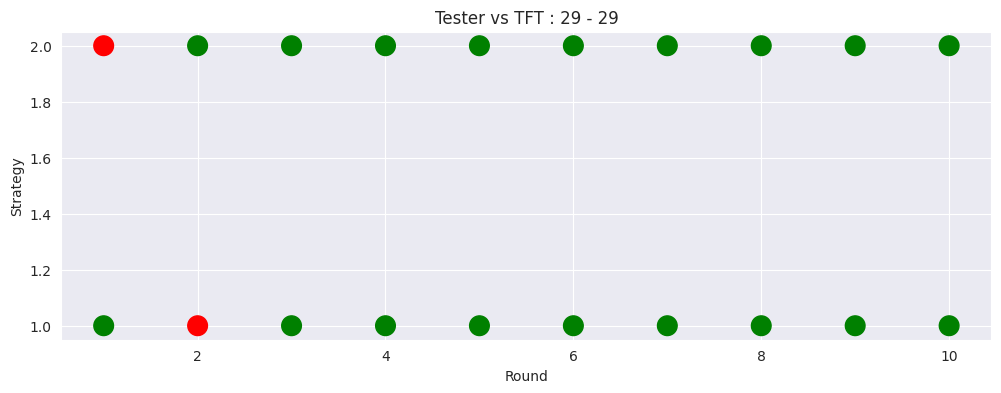

In [249]:
# MAX POINTS = ROUNDS * 5 (I always defect and opponent always cooperates)
# MAX POINTS = ROUNDS * 3 (By both cooperating)
ROUNDS = 10
strategy1 = tester
strategy2 = tit_for_tat
points1, points2 = simulate(ROUNDS, strategy1, strategy2, verbose=False, stats=True, visualize=True)

# Tournament with 1 iteration

In [257]:
def tournament(ROUNDS, strategies_ALL, play_with_itself=False, verbose=False, stats=False):

    strategies = list(strategies_ALL.keys())
    strategies_points = {strategy:0 for strategy in strategies}
    NUM = len(strategies_ALL)
    matches = 0

    if verbose:
        print(f"{70 * '~'}\nThere are {NUM} strategies\nEvery strategy will play one match against the other {NUM - 1} strategies, so:")
        print(f"1v1 Battles = {NUM-1} + {NUM-2} + .... + 2 + 1 = {sum(range(1, NUM))}")
        print(f"Also, every strategy will play with itself, so:")
        print(f"\nTotal Battles = {sum(range(1, NUM))} + {NUM} = {sum(range(1, NUM)) + NUM}\n{70 * '~'}\n")

    for i in range(NUM-1):
        strategy1 = strategies[i]
        for j in range(i + 1, NUM):
            strategy2 = strategies[j]
            matches += 1
            points1, points2 = simulate(ROUNDS, strategy1, strategy2)
            strategies_points[strategy1] += points1
            strategies_points[strategy2] += points2
            if verbose:
                print(f"{matches:2}) {strategies_ALL[strategy1]} vs {strategies_ALL[strategy2]}  :  {points1} - {points2}")

    if play_with_itself:
        if verbose:
            print()
        for strategy in strategies:
            # If stratergy 1 plays with strategy 1, 2 scores are generated for the same strategey ---> Take the average
            matches += 1
            points1, points2 = simulate(ROUNDS, strategy, strategy)
            # print(f"{strategies_points[strategy]} ---> +{points1}", end="")
            strategies_points[strategy] += round((points1 + points2) / 2)
            # print(f" ---> {strategies_points[strategy]}")
            if verbose:
                print(f"{matches:2}) {strategies_ALL[strategy]} vs {strategies_ALL[strategy]}  :  {points1} - {points2}")

    sorted_points = dict(sorted(strategies_points.items(), key=lambda item: item[1], reverse=True))

    if stats:
        print(f"\n{70 * '~'}")
        for strategy in sorted_points.keys():
            print(f"{strategies_ALL[strategy]:11} : {sorted_points[strategy]}")
        print(70 * '~')

    return sorted_points

In [258]:
# Initialization
ROUNDS = 200
sorted_points = tournament(ROUNDS, strategies_ALL, play_with_itself=True, verbose=False, stats=True)


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
TF2T        : 4032
TFT         : 3969
AC          : 3843
Tester      : 3733
Graaskamp   : 3323
Unforgiving : 3312
Joss        : 2679
Ad          : 2432
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


# Tournament with many iterations

## 1) Keep the results in a list of dictionaries

In [271]:
ITERATIONS = 10
results1 = []
results2 = []

for ITERATION in range(1, ITERATIONS + 1):
    sorted_points = tournament(ROUNDS, strategies_ALL, play_with_itself=True)
    results1.append(sorted_points)

for ITERATION in range(1, ITERATIONS + 1):
    sorted_points = tournament(ROUNDS, strategies_ALL)
    results2.append(sorted_points)

# results = [{iter1}, {iter2}, ...., {iter10}]
# Example of {iter1}
"""
TF2T        : 4039
TFT         : 3999
AC          : 3837
Tester      : 3758
Unforgiving : 3338
Graaskamp   : 3309
Joss        : 2723
Ad          : 2432
"""
print(f"The results of simulating a tournament of {ITERATIONS} iterations (with or without\nthe option of a strategy playing with itself) have been generated !!!!")

The results of simulating a tournament of 10 iterations (with or without
the option of a strategy playing with itself) have been generated !!!!


## 2) Concatenate the tournaments' results

In [272]:
def play_many_tournaments(ITERATIONS, ROUNDS, results1, results2, stats=False):

    strategies = list(strategies_ALL.keys())
    LEN = len(strategies)
    all_tourn_points1 = {strategy:0 for strategy in strategies}
    all_tourn_points2 = {strategy:0 for strategy in strategies}
    for strategy in strategies:
        for ITERATION in range(ITERATIONS):
            all_tourn_points1[strategy] += results1[ITERATION][strategy]
            all_tourn_points2[strategy] += results2[ITERATION][strategy]

    sorted1 = dict(sorted(all_tourn_points1.items(), key=lambda item: item[1], reverse=True))
    sorted2 = dict(sorted(all_tourn_points2.items(), key=lambda item: item[1], reverse=True))

    if stats:
        print(f"{70 * '~'}\nTournaments : {ITERATIONS}   |  Matches : {LEN}  |  Rounds : {ROUNDS}\n")
        for strategy in sorted1.keys():
            print(f"{strategies_ALL[strategy]:11} : {sorted1[strategy]}")
        print(70 * '~', '\n\n')
        print(f"{70 * '~'}\nTournaments : {ITERATIONS}   |  Matches : {LEN-1}  |  Rounds : {ROUNDS}\n")
        for strategy in sorted2.keys():
            print(f"{strategies_ALL[strategy]:11} : {sorted2[strategy]}")
        print(70 * '~')

    return sorted1, sorted2

In [273]:
def print_bars(ax, BAR):
    # Loop through each bar in bar1
    for bar in BAR:
        width = bar.get_width()
        y = bar.get_y() + bar.get_height() / 2
        ax.text(width/2, y, f'{width}', ha='center', va='center', color='white', fontsize=10)


def visualize_tournaments(ITERATIONS, ROUNDS, sorted1, sorted2):

    # Data
    print("\n")
    LEN = len(sorted1) if len(sorted1) == len(sorted2) else 0
    x = np.arange(1, LEN + 1)
    y1 = list(sorted1.values())
    y2 = list(sorted2.values())
    xticks1 = [strategies_ALL[strategy] for strategy in sorted1.keys()]
    xticks2 = [strategies_ALL[strategy] for strategy in sorted2.keys()]
    xticks1.reverse()
    xticks2.reverse()
    y1.reverse()
    y2.reverse()

    # Display
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
    bar1 = ax1.barh(x, y1, color='green')
    ax1.set_title(f"Tournaments : {ITERATIONS}   |  Matches : {LEN}  |  Rounds : {ROUNDS}")
    ax1.set_xlabel('Points')
    ax1.set_ylabel('Strategy')
    ax1.set_yticks(x)
    ax1.set_yticklabels(xticks1)
    print_bars(ax1, bar1)

    bar2 = ax2.barh(x, y2, color='red')
    ax2.set_title(f"Tournaments : {ITERATIONS}   |  Matches : {LEN-1}  |  Rounds : {ROUNDS}")
    ax2.set_xlabel('Points')
    ax2.set_ylabel('Strategy')
    ax2.set_yticks(x)
    ax2.set_yticklabels(xticks2)
    print_bars(ax2, bar2)
    plt.show()
    print("\n")

In [274]:
def elaborate_stats(ITERATIONS, ROUNDS, sorted1, sorted2):

    MATCHES1 = len(sorted1) if len(sorted1) == len(sorted2) else 0
    MATCHES2 = MATCHES1 - 1

    winner1 = list(sorted1.keys())[0]
    winner2 = list(sorted2.keys())[0]
    loser1 = list(sorted1.keys())[-1]
    loser2 = list(sorted2.keys())[-1]

    w1_name = strategies_ALL[winner1]
    w2_name = strategies_ALL[winner2]
    l1_name = strategies_ALL[loser1]
    l2_name = strategies_ALL[loser2]

    w1_score = sorted1[winner1]
    w2_score = sorted2[winner2]
    l1_score = sorted1[loser1]
    l2_score = sorted2[loser2]

    # For the case a strategy plays also with itself
    print(f"{70 * '~'}\nTournaments : {ITERATIONS}   |  Matches : {MATCHES1}  |  Rounds : {ROUNDS}\n")
    df1_dict = {"Best Strategy": [w1_name, w1_score, w1_score / ITERATIONS, w1_score / ITERATIONS / MATCHES1, w1_score / ITERATIONS / MATCHES1 / ROUNDS], "Worst Strategy": [l1_name, l1_score, l1_score / ITERATIONS, l1_score / ITERATIONS / MATCHES1, l1_score / ITERATIONS / MATCHES1 / ROUNDS]}
    df1 = pd.DataFrame(data=df1_dict)
    df1.index = ["Name", "Total Points", "Points / Tournament", "Points / Match", "Points / Round"]
    print(df1, '\n\n\n')
    print(f"Tournaments : {ITERATIONS}   |  Matches : {MATCHES2}  |  Rounds : {ROUNDS}\n")
    df2_dict = {"Best Strategy": [w2_name, w2_score, w2_score / ITERATIONS, w2_score / ITERATIONS / MATCHES2, w2_score / ITERATIONS / MATCHES2 / ROUNDS], "Worst Strategy": [l2_name, l2_score, l2_score / ITERATIONS, l2_score / ITERATIONS / MATCHES2, l2_score / ITERATIONS / MATCHES2 / ROUNDS]}
    df2 = pd.DataFrame(data=df2_dict)
    df2.index = ["Name", "Total Points", "Points / Tournament", "Points / Match", "Points / Round"]
    print(df2, f"\n{70 * '~'}")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Tournaments : 10   |  Matches : 8  |  Rounds : 200

TF2T        : 40293
TFT         : 39620
AC          : 38403
Tester      : 37516
Unforgiving : 33356
Graaskamp   : 33058
Joss        : 26556
Ad          : 24320
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Tournaments : 10   |  Matches : 7  |  Rounds : 200

TF2T        : 33864
TFT         : 33812
Tester      : 33741
AC          : 32334
Graaskamp   : 29895
Unforgiving : 27250
Joss        : 24061
Ad          : 22320
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~




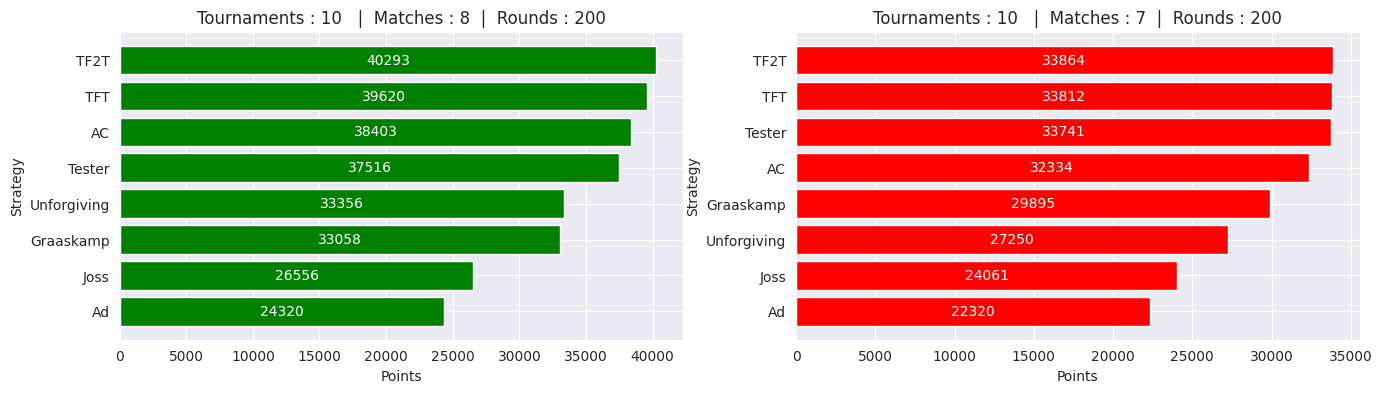



~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Tournaments : 10   |  Matches : 8  |  Rounds : 200

                    Best Strategy Worst Strategy
Name                         TF2T             Ad
Total Points                40293          24320
Points / Tournament        4029.3         2432.0
Points / Match           503.6625          304.0
Points / Round           2.518312           1.52 



Tournaments : 10   |  Matches : 7  |  Rounds : 200

                    Best Strategy Worst Strategy
Name                         TF2T             Ad
Total Points                33864          22320
Points / Tournament        3386.4         2232.0
Points / Match         483.771429     318.857143
Points / Round           2.418857       1.594286 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [275]:
# Prints the basic stats + visualize the results + show more elaborate stats
sorted1, sorted2 = play_many_tournaments(ITERATIONS, ROUNDS, results1, results2, stats=True)
visualize_tournaments(ITERATIONS, ROUNDS, sorted1, sorted2)
elaborate_stats(ITERATIONS, ROUNDS, sorted1, sorted2)